<a href="https://colab.research.google.com/github/sudehashrafi/Machine-Learning-Course-UOIT/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import IPython
!pip install -q -U keras-tuner
import keras_tuner as kt
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.4 MB/s eta 0:00:00
Using TensorFlow backend


Preprocessing data

In [ ]:
# This code fetches a dataset (Abalone) from the UCI repository, preprocesses it by replacing categorical values in the 'Sex' column with numerical values
# Separates the features (X) and target variable (y) for further analysis.
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets
features = pd.DataFrame(X)
features['Rings'] = y['Rings']
features['Sex'].replace({'I':0, 'F':1, 'M':2}, inplace = True)
y = features['Sex']
X = features.drop('Sex', axis=1)

Test/Train split

In [ ]:
# Splitting the data into training and testing sets with a 50% test size and a fixed random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Scale the data

In [ ]:
# Standardize (normalize) the training data using the StandardScaler and apply the same transformation to the validation data.
scaler=StandardScaler()
train_data = scaler.fit_transform(X_train)
val_data = scaler.transform(X_test)

Creating our DNN model

In [ ]:
# Create a sequential neural network model with:
# - Input layer flattening an 8-dimensional input
# - A dense layer with 300 neurons, ReLU activation, and HeNormal weight initialization
# - Another dense layer with 100 neurons and ELU activation
# - Output layer with 3 neurons and softmax activation for classification
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[8]),
keras.layers.Dense(300, activation="relu", kernel_initializer="HeNormal"),
keras.layers.Dense(100, activation="elu"),
keras.layers.Dense(3, activation="softmax")
])

Diagram of the model

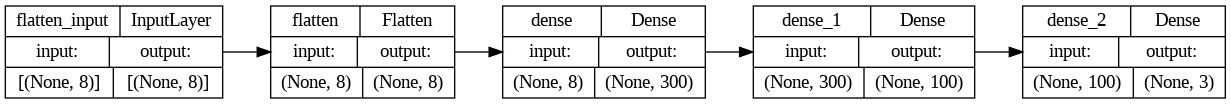

In [ ]:
# This code uses Keras's plot_model function to create a visual representation of a neural network model and saves it as "abalone-db.png".
# It includes shapes of layers and arranges the diagram from left to right (rankdir='LR').
keras.utils.plot_model(model, "abalone-db.png", show_shapes=True, rankdir = 'LR')

Compiling the model, using sparse_categorical_crossentropy as our loss function

In [ ]:
# This code compiles a machine learning model using the sparse categorical cross-entropy loss function,
# the Adam optimizer, and tracks the accuracy metric during training.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Training the model

In [ ]:
history = model.fit(train_data, y_train, epochs=100, validation_data=(val_data, y_test), verbose=1)# Turn verbose=1 to printing epochs

Epoch 1/100
66/66 [==============================] - 2s 9ms/step - loss: 0.9507 - accuracy: 0.5206 - val_loss: 0.8755 - val_accuracy: 0.5505
Epoch 2/100
66/66 [==============================] - 0s 5ms/step - loss: 0.8642 - accuracy: 0.5632 - val_loss: 0.8978 - val_accuracy: 0.5510
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 0.8562 - accuracy: 0.5714 - val_loss: 0.8503 - val_accuracy: 0.5548
Epoch 4/100
66/66 [==============================] - 1s 9ms/step - loss: 0.8478 - accuracy: 0.5685 - val_loss: 0.8645 - val_accuracy: 0.5744
Epoch 5/100
66/66 [==============================] - 1s 9ms/step - loss: 0.8522 - accuracy: 0.5704 - val_loss: 0.8685 - val_accuracy: 0.5462
Epoch 6/100
66/66 [==============================] - 1s 10ms/step - loss: 0.8540 - accuracy: 0.5642 - val_loss: 0.8749 - val_accuracy: 0.5491
Epoch 7/100
66/66 [==============================] - 1s 9ms/step - loss: 0.8353 - accuracy: 0.5800 - val_loss: 0.8583 - val_accuracy: 0.5586
Epoch 8/100


Plotting loss, accuracy, val_loss, and val_accuracy

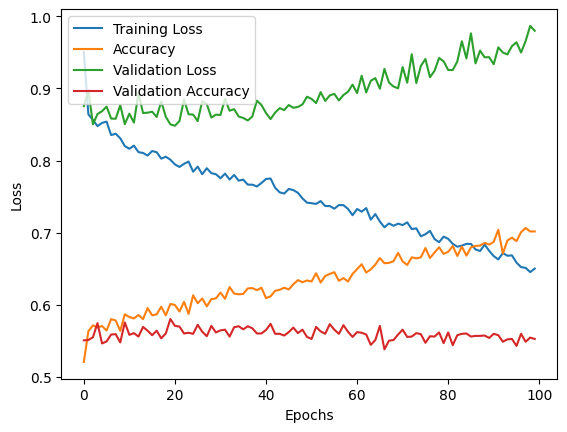

In [ ]:
# This code plots training and validation loss, as well as training and validation accuracy,
# over the course of training epochs to visualize the model's performance during training.
# It uses Matplotlib for plotting and relies on data from the 'history' object.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# As training progresses, the training loss typically decreases, indicating that the model is learning to fit the training data better.
# During training, accuracy tends to improve as the model learns to make more accurate predictions on the training set.
# An increase in validation loss indicates that the model may be overfitting the training data and not generalizing well.

Creating our DNN model again and compiling it, having modified some hyperparameters

In [ ]:
#The code defines a function called model_builder(hp) that builds a neural network model with tunable hyperparameters using the Keras framework.
#The model consists of a flattened input layer, batch normalization, a hidden dense layer with a tunable number of units, a dropout layer, and an output layer with 3 units for classification.
#The hyperparameters to be tuned include the number of units in the hidden layer and the choice of optimizer.
#The model is compiled with the specified optimizer and sparse categorical cross-entropy loss, and it returns the constructed model.
def model_builder(hp):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[8]))
  model.add(keras.layers.BatchNormalization())

  # Tune the number of units in the two hidden layers:
  hp_units_1 = hp.Int('units_1', min_value = 8, max_value = 32, step = 8)
  model.add(keras.layers.Dense(units = hp_units_1, activation="relu"))
  #model.add(keras.layers.BatchNormalization())
  #hp_units_2 = hp.Int('units_2', min_value = 0, max_value = 32, step = 8)
  #model.add(keras.layers.Dense(units = hp_units_2, activation="relu"))
  model. add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.Dense(3, activation='softmax'))

  # Tune the optimizer:
  hp_optimizer = hp.Choice('optimizer', ['Adam', 'RMSProp', 'SGD', 'Adagrad', 'Adamax'])
  model.compile(optimizer = hp_optimizer,
                loss = "sparse_categorical_crossentropy", #keras.losses.MeanSquaredError(),
                metrics = ['accuracy'])
  return model

Setting up the Keras tuner utility

In [ ]:
# Create a hyperparameter tuner using Keras Tuner's Hyperband algorithm.
# It will search for the best model hyperparameters to maximize validation accuracy,
# with a maximum of 100 training epochs and a factor of 3 for halving the search space.
# If an existing tuner with the same name exists, it will be overwritten.
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 100,
                     factor = 3,
                     overwrite = True)

Searching for the best hyperparameters

In [ ]:
# This code uses a tuner to search for optimal hyperparameters for a machine learning model
# by training it on the 'train_data' with labels 'y_train' for 100 epochs,
# and validating the model's performance on 'val_data' with labels 'y_test'.
tuner.search(train_data, y_train, epochs = 100, validation_data=(val_data, y_test))

Trial 20 Complete [00h 00m 02s]
val_accuracy: 0.3504068851470947

Best val_accuracy So Far: 0.5481091141700745
Total elapsed time: 00h 00m 51s


Retrieving the best hyperparameters from the search

In [ ]:
# This code retrieves the best hyperparameter values from a tuner object and stores them in a list.
# It assumes that the tuner has a method called 'get_best_hyperparameters()' that returns a list of hyperparameter values.
# The [0] index is used to access the first set of best hyperparameters in case there are multiple.
# Finally, the '.values' attribute is used to access the actual hyperparameter values.
tuner.get_best_hyperparameters()[0].values

{'units_1': 32,
 'optimizer': 'Adam',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

Fitting our model with the new hyperparameters

In [ ]:
# This code retrieves the best hyperparameters found during hyperparameter tuning using a tuner,
# builds a neural network model with those hyperparameters, and then trains the model on the
# training data (X_train and y_train) for 100 epochs, while also validating it on the test data
# (X_test and y_test). The training progress is printed with verbose=1.
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
model_e = tuner.hypermodel.build(best_hps)
history_e = model_e.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)# Turn verbose=1 to printing epochs

Epoch 1/100
66/66 [==============================] - 2s 11ms/step - loss: 1.1639 - accuracy: 0.3305 - val_loss: 1.0957 - val_accuracy: 0.3696
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 0.9697 - accuracy: 0.4847 - val_loss: 0.9832 - val_accuracy: 0.4878
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 0.9341 - accuracy: 0.5225 - val_loss: 0.9330 - val_accuracy: 0.5208
Epoch 4/100
66/66 [==============================] - 1s 7ms/step - loss: 0.9286 - accuracy: 0.5096 - val_loss: 0.9104 - val_accuracy: 0.5347
Epoch 5/100
66/66 [==============================] - 0s 6ms/step - loss: 0.9109 - accuracy: 0.5163 - val_loss: 0.8920 - val_accuracy: 0.5419
Epoch 6/100
66/66 [==============================] - 1s 11ms/step - loss: 0.9070 - accuracy: 0.5187 - val_loss: 0.8849 - val_accuracy: 0.5481
Epoch 7/100
66/66 [==============================] - 1s 11ms/step - loss: 0.9053 - accuracy: 0.5244 - val_loss: 0.8728 - val_accuracy: 0.5500
Epoch 8/10

Plotting loss, accuracy, val_loss, and val_accuracy

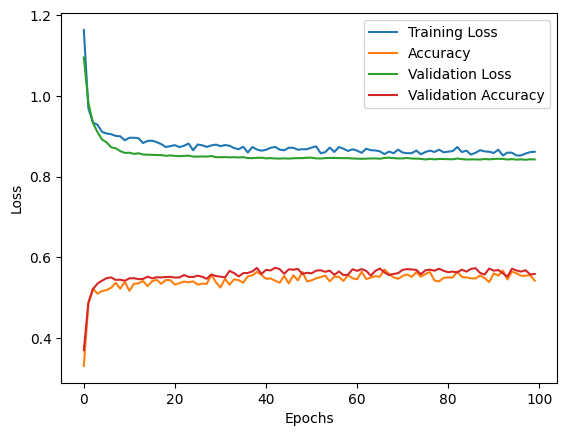

In [ ]:
# This code plots training and validation loss, as well as training and validation accuracy,
# over the course of training epochs to visualize the model's performance during training.
# It uses Matplotlib for plotting and relies on data from the 'history' object.
plt.plot(history_e.history['loss'], label='Training Loss')
plt.plot(history_e.history['accuracy'], label='Accuracy')
plt.plot(history_e.history['val_loss'], label='Validation Loss')
plt.plot(history_e.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# As training progresses, the training loss typically decreases, indicating that the model is learning to fit the training data better.
# During training, accuracy tends to improve as the model learns to make more accurate predictions on the training set.
# An increase in validation loss indicates that the model may be overfitting the training data and not generalizing well.
# There is no increase in validation loss here, meaning we have improved the model and it is no longer overfitting.

Diagram of the model

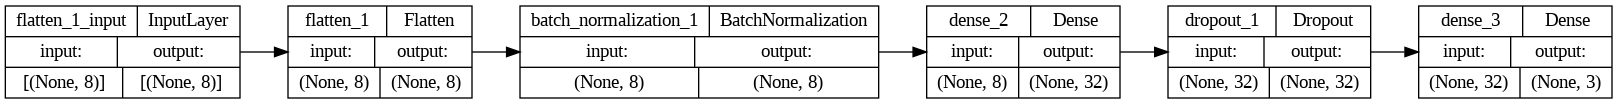

In [ ]:
# This code uses Keras' plot_model function to visualize the architecture of the 'model_e' neural network,
# saving the visualization as "abalone-dc.png" with shapes of layers displayed and a left-to-right layout.
keras.utils.plot_model(model_e, "abalone-dc.png", show_shapes=True, rankdir='LR')